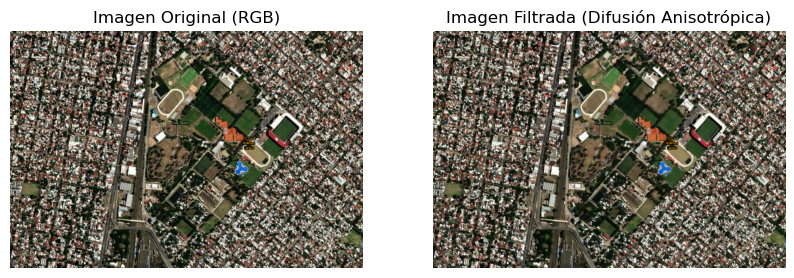

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def anisotropic_diffusion(image, num_iterations, kappa, lambda_param):
    # Convertir la imagen a float32
    img = image.astype(np.float32)

    for _ in range(num_iterations):
        # Calcular los gradientes en 4 direcciones
        north = np.roll(img, -1, axis=0)
        south = np.roll(img, 1, axis=0)
        east = np.roll(img, -1, axis=1)
        west = np.roll(img, 1, axis=1)

        # Diferencias
        deltaN = north - img
        deltaS = south - img
        deltaE = east - img
        deltaW = west - img

        # Coeficientes de difusión
        cN = np.exp(-(deltaN / kappa) ** 2)
        cS = np.exp(-(deltaS / kappa) ** 2)
        cE = np.exp(-(deltaE / kappa) ** 2)
        cW = np.exp(-(deltaW / kappa) ** 2)

        # Actualización de la imagen
        img += lambda_param * (cN * deltaN + cS * deltaS + cE * deltaE + cW * deltaW)

    return img

# Leer la imagen en color
image = cv2.imread('lanus.png')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convertir de BGR a RGB para matplotlib

# Aplicar el filtro de difusión anisotrópica
num_iterations = 10  # Número de iteraciones
kappa = 15  # Parámetro de sensibilidad al gradiente
lambda_param = 0.25  # Tasa de actualización
filtered_image = anisotropic_diffusion(image_rgb, num_iterations, kappa, lambda_param)

# Mostrar la imagen original y la filtrada
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Imagen Original (RGB)')
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Imagen Filtrada (Difusión Anisotrópica)')
plt.imshow(filtered_image.astype(np.uint8))  # Convertir de nuevo a uint8 para visualización
plt.axis('off')

plt.show()
